In [ ]:
# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [46]:
# import libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")

plt.style.use("ggplot")
rcParams["figure.figsize"] = [16, 9]
rcParams["xtick.labelsize"] = 14
rcParams["ytick.labelsize"] = 14
rcParams["font.size"] = 14

In [3]:
# load the dataset
data = pd.read_csv('../input/time-series-forecasting-with-yahoo-stock-price/yahoo_stock.csv', parse_dates=True, index_col=0)

In [4]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [5]:
# check how many null values
data.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

Text(0.5, 1.0, 'Original:Close')

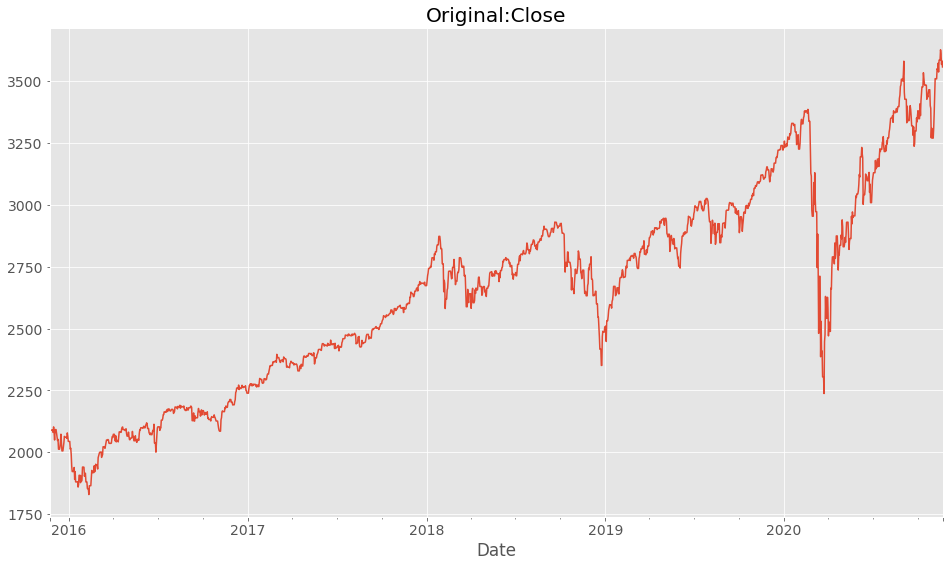

In [12]:
data.Close.plot()
plt.title('Original:Close')

In [7]:
#check time range
print(data.index.min())
print(data.index.max())

2015-11-23 00:00:00
2020-11-20 00:00:00


Text(0.5, 1.0, 'Smoothed')

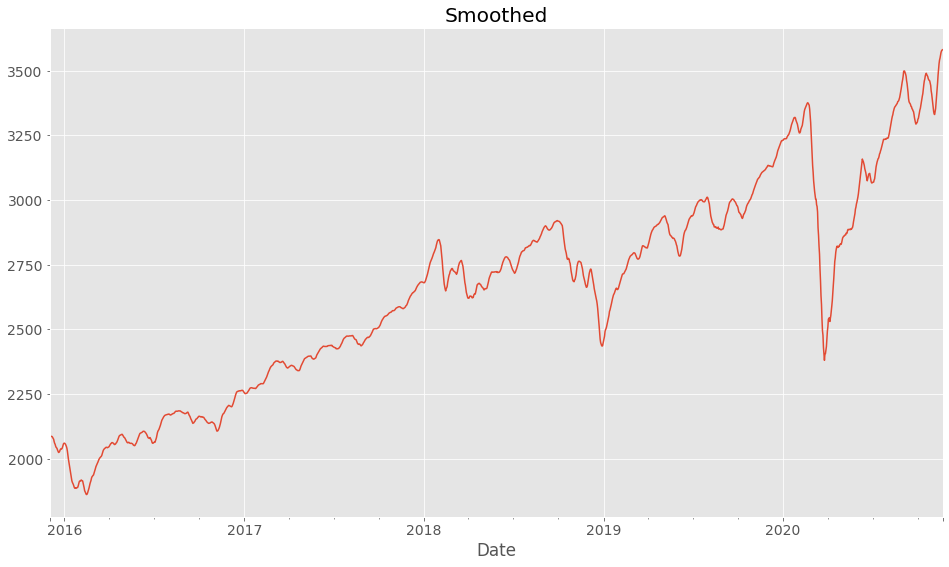

In [13]:
# series to forecast
close_ts = data.Close

# smouth the time seies
ts_smouth = close_ts.rolling(10).mean().dropna()
ts_smouth.plot()
plt.title('Smoothed')

Text(0.5, 1.0, 'Window-Normalized')

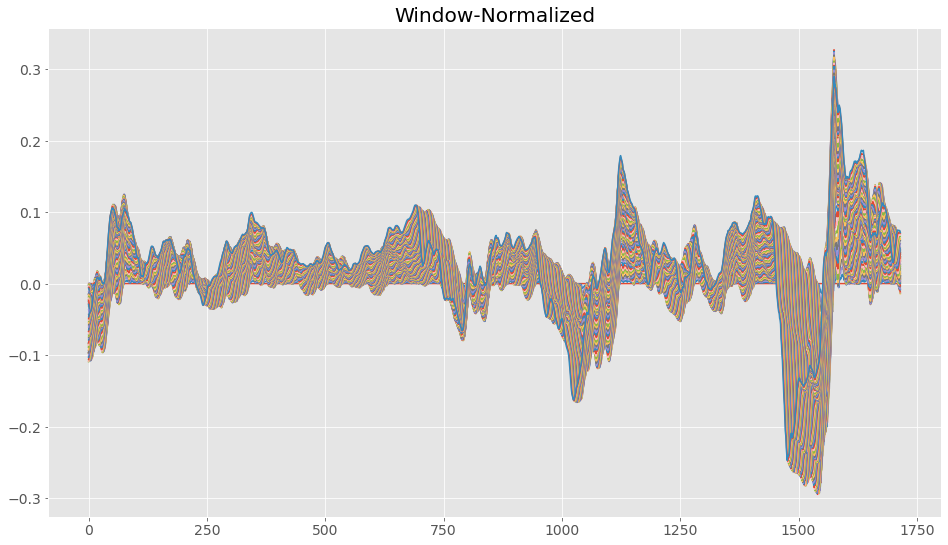

In [37]:
# data normalization in the window
window = 100
ts_lenght = len(ts_smouth)

ts_wind = []
for i in range(ts_lenght - window):
    ts_wind.append(ts_smouth[i: i + window])
    
ts_normalised = []
for window in ts_wind:
    normalised_window = [x / window[0] - 1 for x in window]
    ts_normalised.append(normalised_window)

plt.plot(ts_normalised);
plt.title('Window-Normalized')

In [45]:
# train-test split function
def train_test_split(input_array:list, train_size:float):
    """
    Train-Test splitting fucntion.
    input
    input_array: array, train_size: float {train size from 0 to 1}
    output
    train: array, test: array
    """
    ts_normalised = np.array(input_array)
    n = ts_normalised.shape[0]
    n_rows = int(round(1 - n * train_size))
    
    return ts_normalised[:n_rows, :], ts_normalised[n_rows:, :]


train, test = train_test_split(ts_normalised, 0.2)
print('Train size', train.shape)
print('*' * 20)
print('Test size', test.shape)

Train size (1374, 100)
********************
Test size (342, 100)


In [ ]:
# scale data from 0 to 1
sacler = MinMaxScaler(feature_range=(0, 1))